# Question 1

# Question 1.1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

Text(0, 0.5, 'SPX Index')

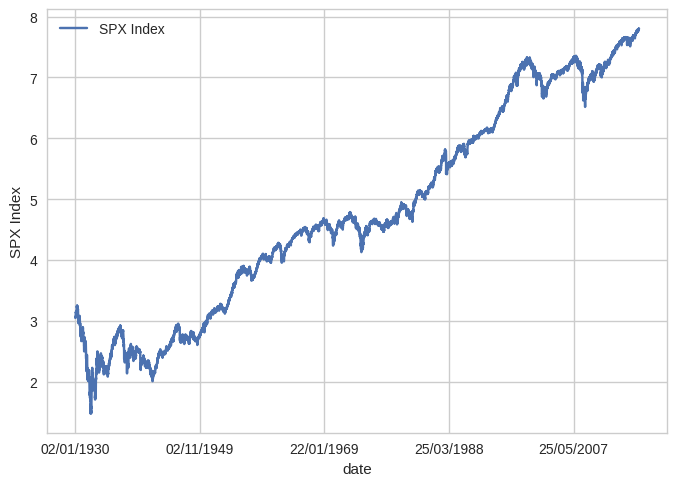

In [ ]:
px = pd.read_csv("priceData.csv")
logpx = np.log(px["SPX Index"])
logpx_plot = pd.concat([px["date"], logpx], axis=1)
logpx_plot.plot(x="date", y="SPX Index")
plt.xlabel("date")
plt.ylabel("SPX Index")

# Question 1.2

<Figure size 800x550 with 0 Axes>

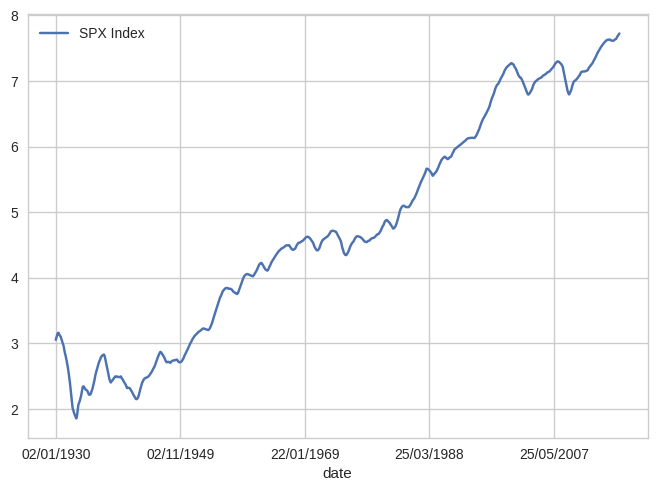

<Figure size 800x550 with 0 Axes>

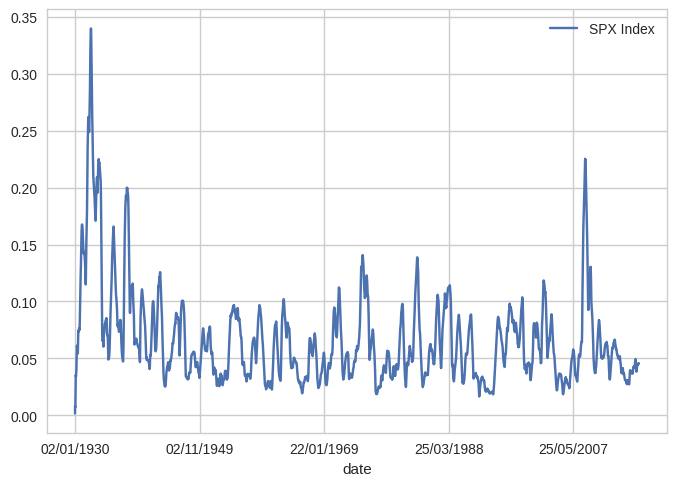

In [28]:
plt.figure()
logpx_rolling_mean = logpx.ffill().rolling(252, min_periods=1).mean() #ffill to fill the missing values and min periods 1 to take the first 251 values without rolling
logpx_rolling_mean_plot = pd.concat([px["date"], logpx_rolling_mean], axis=1)
logpx_rolling_mean_plot.plot(x="date", y="SPX Index")
plt.show()

plt.figure()
logpx_rolling_std = logpx.ffill().rolling(252, min_periods=1).std() #ffill to fill the missing values and min periods 1 to take the first 251 values without rolling
logpx_rolling_std_plot = pd.concat([px["date"], logpx_rolling_std], axis=1)
logpx_rolling_std_plot.plot(x="date", y="SPX Index")
plt.show()

# Question 1.3

<Axes: xlabel='date'>

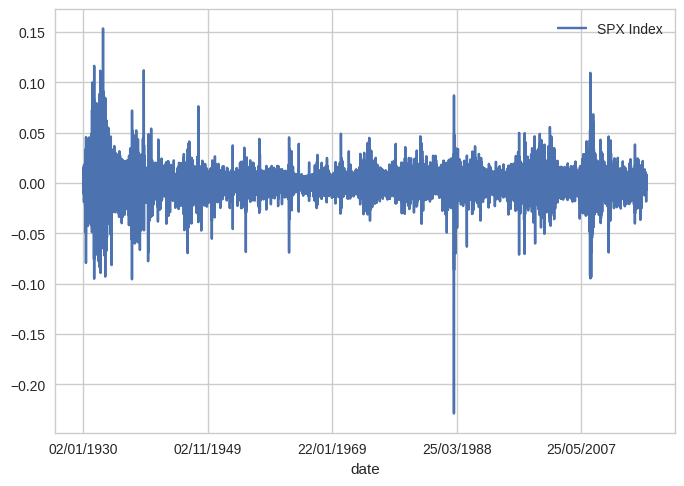

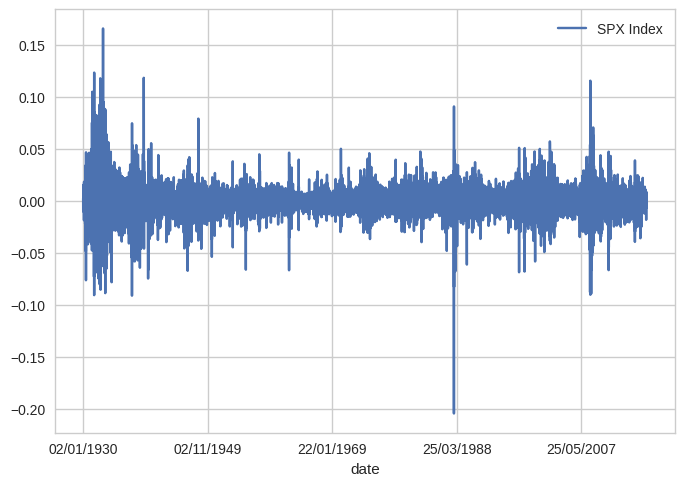

In [29]:
logret = logpx.ffill().diff()
logret_plot = pd.concat([px["date"], logret], axis=1)
logret_plot.plot(x="date", y="SPX Index")

simpret = px["SPX Index"].ffill().pct_change()
simpret_plot = pd.concat([px["date"], simpret], axis=1)
simpret_plot.plot(x="date", y="SPX Index")


<Figure size 800x550 with 0 Axes>

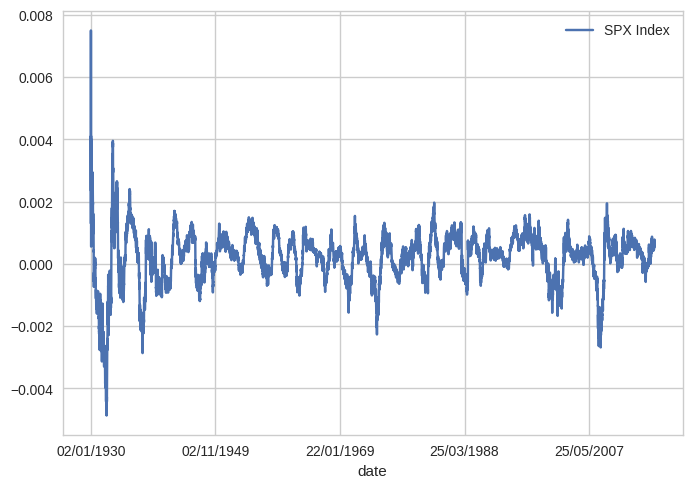

<Figure size 800x550 with 0 Axes>

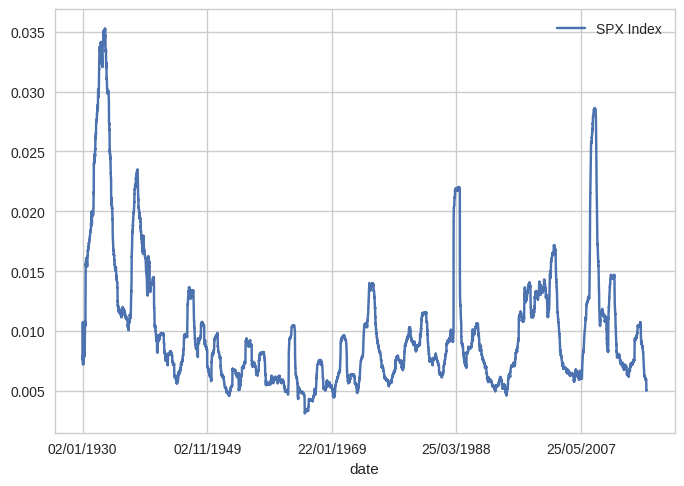

<Figure size 800x550 with 0 Axes>

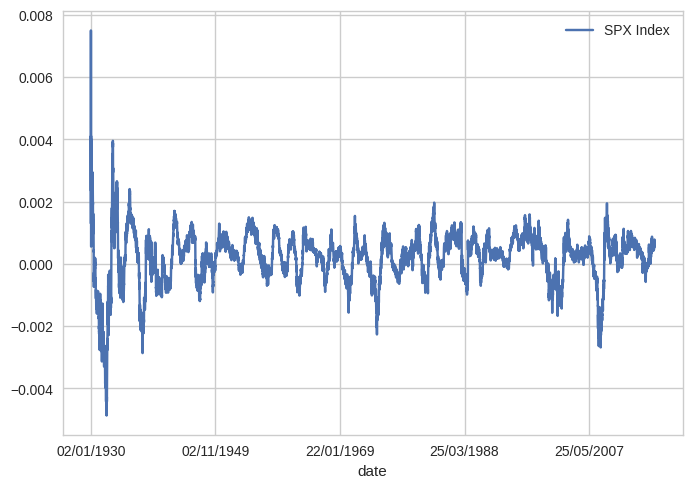

<Figure size 800x550 with 0 Axes>

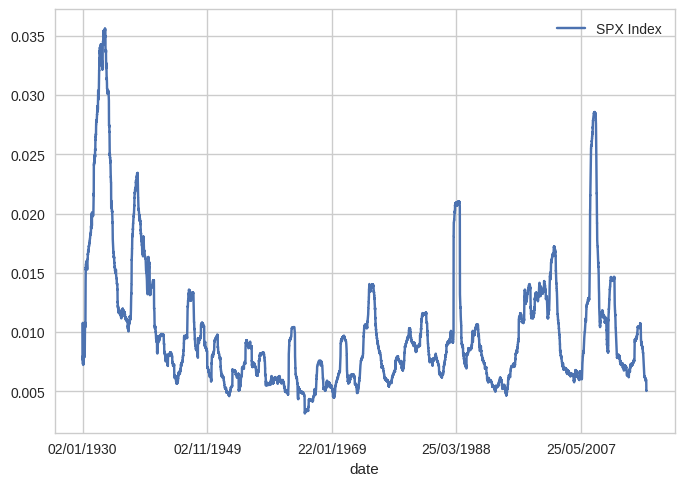

In [31]:
plt.figure()
logret_rolling_mean = logret.rolling(252, min_periods=1).mean() #ffill to fill the missing values and min periods 1 to take the first 251 values without rolling
logret_rolling_mean_plot = pd.concat([px["date"], logret_rolling_mean], axis=1)
logret_rolling_mean_plot.plot(x="date", y="SPX Index")
plt.show()

plt.figure()
logret_rolling_std = logret.rolling(252, min_periods=1).std() #ffill to fill the missing values and min periods 1 to take the first 251 values without rolling
logret_rolling_std_plot = pd.concat([px["date"], logret_rolling_std], axis=1)
logret_rolling_std_plot.plot(x="date", y="SPX Index")
plt.show()

plt.figure()
simpret_rolling_mean = simpret.rolling(252, min_periods=1).mean() #ffill to fill the missing values and min periods 1 to take the first 251 values without rolling
simpret_rolling_mean_plot = pd.concat([px["date"], logret_rolling_mean], axis=1)
simpret_rolling_mean_plot.plot(x="date", y="SPX Index")
plt.show()

plt.figure()
simpret_rolling_std = simpret.rolling(252, min_periods=1).std() #ffill to fill the missing values and min periods 1 to take the first 251 values without rolling
simpret_rolling_std_plot = pd.concat([px["date"], simpret_rolling_std], axis=1)
simpret_rolling_std_plot.plot(x="date", y="SPX Index")
plt.show()

# Question 1.4

In [32]:
from scipy import stats
jb_stats = stats.jarque_bera(px["SPX Index"].dropna())
print(jb_stats.pvalue)
print(jb_stats.statistic)

0.0
9841.005017016492


# Question 1.5

Day 1:  Day 2:  Day 3:
$1      $2      $1   
Simp Returns:
Day 1:  Day 2:  Day 3:
0      1        -0.50

Log Returns:
Day 1:  Day 2:  Day 3:
0       0.69     -0.69


Looking at this we can see that logarithmic percentage changes are addative rather than mutiplicative therefore it removes directional bias within our data.


# Question 1.6

When analyzing rapodly changing assets over shorter time frames with smaller overall changes the regular simple returns will approximate closely to that of the log returns while maintaining simplicity. This can be important in fast acting systems as the log can be a computationally expensive operation to compute.